## Personalized Cancer Diagnosis

**Featurization:** Gene(Onehot), Variation(TfidfVec), Text(TfidfVec)

**Data Source:**https://www.kaggle.com/c/msk-redefining-cancer-treatment

### Exploratory Data Analysis(EDA)

In [1]:
#Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading Gene,Variation and Text Data

In [3]:
#Loading training_text.csv file.
data_text = pd.read_csv('training_text',sep='\|\|',header=None,skiprows=1,names=['ID','Text'],engine='python')
print("Number Data Points: ",data_text.shape[0])
print("Number Features: ",data_text.shape[1])
data_text.head()

Number Data Points:  3321
Number Features:  2


,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


**Text:** Clinical Literature data written by professional doctors.

In [4]:
#Loading training_variants.csv file.
data_var = pd.read_csv('training_variants')
print("Number of Data points: ",data_var.shape[0])
print("Number of Features: ",data_var.shape[1])
data_var.head()

Number of Data points:  3321
Number of Features:  4


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


**ID:** the id of the row used to link the mutation to the clinical evidence

**Gene:** the gene where this genetic mutation is located

**Variation:** the aminoacid change for this mutations.

**Class:** 1-9 the class this genetic mutation has been classified on

#### Text Preprocessing

In [8]:
#Loading the Stop words from nltk library.
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

snowball_stemmer = SnowballStemmer("english")
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string_1 = ""
        #Replace special chars with space
        total_text = re.sub('[^a-zA-Z0-9\n]',' ',total_text)
        #Replace Multiple spaces with single space.
        total_text = re.sub('\s+',' ',total_text)
        #Convert all upper case words to lower case.
        total_text = total_text.lower()
        #Stop word Removal.
        for word_1 in total_text.split():
            #If the word is not stop word then retain it, otherwise remove it.
            if not word_1 in stop_words:
                string_1 += word_1 + " "
        total_text = string_1
        #Stemming using Snowball Stemmer.
        string_2 = ""
        for word_2 in total_text.split():
            string_2 += snowball_stemmer.stem(word_2) + " "
        total_text = string_2
        #Lemmatizer
        string_3 = ""
        for word_3 in total_text.split():
            string_3 += wordnet_lemmatizer.lemmatize(word_3) + " "
        
        data_text[column][index] = string_3

In [9]:
#Text Preprocessing stage.
import time
start_time = time.clock()
for index,row in data_text.iterrows():
    nlp_preprocessing(row['Text'], index, 'Text')
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

Time took for preprocessing the text : 2292.844755426827 seconds


In [10]:
#Now joining train_var_df and train_text_df using merge function.
data = pd.merge(data_var, data_text, how='left', on='ID')
data.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,cyclin depend kina cdks regul varieti fundamen...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evid demonstr acquir uniparent disomi a...
4,4,CBL,L399V,4,oncogen mutat monomer casita b lineag lymphoma...


#### Train,Test and Cross Validation Split

In [11]:
from sklearn.model_selection import train_test_split
y_true = data['Class'].values
data.Gene = data.Gene.str.replace('\s+','_')
data.Variation = data.Variation.str.replace('\s+','_')
#Split the data as train and test 
X_1, X_test, y_1, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.2)
#Split the X_1 and y_1 into train and Cross validate
X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, stratify=y_1, test_size=0.2)
print(X_1.head())

        ID    Gene      Variation  Class  \
2104  2104     AXL  Amplification      2   
1306  1306    MLH1          R265C      4   
325    325    ROS1         G1971E      2   
1995  1995  MAP2K1           R49L      7   
3227  3227   NTRK1  Amplification      7   

                                                   Text  
2104  ntroduct p53 mutat common lung cancer rang 33 ...  
1306  hereditari non polyposi colorect cancer hnpcc ...  
325   rapid grow recognit role oncogen ros1 fusion p...  
1995  abstract scirrhous subtyp gastric cancer high ...  
3227  abstract background nerv growth factor ngf rec...  


In [12]:
print("Number of data points in Train data:",X_train.shape[0])
print("Number of data points in Cross validation data:",X_cv.shape[0])
print("Number of data points in Test data:",X_test.shape[0])

Number of data points in Train data: 2124
Number of data points in Cross validation data: 532
Number of data points in Test data: 665


#### Distribution of y_i's in Train,Test and Cross Validation datasets

In [13]:
import warnings
warnings.filterwarnings("ignore")
#It returns a dict, keys as class labels and values as the no of data points in the class
train_class_distribution = X_train['Class'].value_counts().sortlevel()
cv_class_distribution = X_cv['Class'].value_counts().sortlevel()
test_class_distribution = X_test['Class'].value_counts().sortlevel()

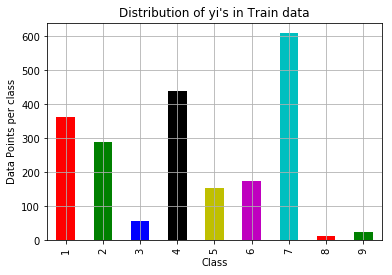

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)


In [14]:
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data Points per class')
plt.title("Distribution of yi's in Train data")
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)# -(train_class_distribution.values): the minus sign will give us in decreasing order
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')

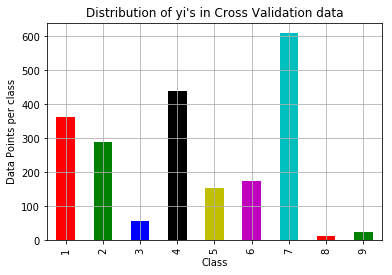

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [15]:
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data Points per class')
plt.title("Distribution of yi's in Cross Validation data")
plt.grid()
plt.show()

sorted_yi = np.argsort(-cv_class_distribution.values)# -(train_class_distribution.values): the minus sign will give us in decreasing order
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/X_cv.shape[0]*100), 3), '%)')

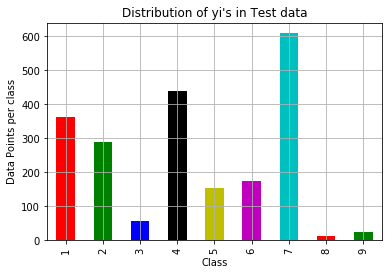

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)


In [16]:
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data Points per class')
plt.title("Distribution of yi's in Test data")
plt.grid()
plt.show()

sorted_yi = np.argsort(-test_class_distribution.values)# -(train_class_distribution.values): the minus sign will give us in decreasing order
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/X_test.shape[0]*100), 3), '%)')

### Prediction using a Random Model

* In a 'Random Model' we generate nine class probabilities randomly such that they sum to 1.

In [17]:
from sklearn.metrics import confusion_matrix
#This function plot the confusion matrix given y_true and y_pred
def plot_confusion_matrix(test_y,predict_y):
    
    C = confusion_matrix(test_y,predict_y)
    #C is 9x9 confusion matrix
    
    A = (((C.T)/(C.sum(axis=1))).T)
    #Divide each of the elements in a confusion matrix with sum of elements in that column.
    
    B = (C/C.sum(axis=1))
    #Divide each of the elements in a confusion matrix with sum of the elements in the row.
    
    labels = [1,2,3,4,5,6,7,8,9]
    #Represent C in heatmap format
    print("-"*50, "Confusion Matrix", "-"*50)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #Represent A in heatmap format
    print("-"*45, "Recall Matrix (Row Sum=1)", "-"*45)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #Represent B in heatMap format
    print("-"*45, "Precision Matrix (Column Sum=1)", "-"*45)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()



Log loss on Cross Validation data using Random Model 2.473461509356292
Log loss on Test Data using Random Model 2.5675735484910076
-------------------------------------------------- Confusion Matrix --------------------------------------------------


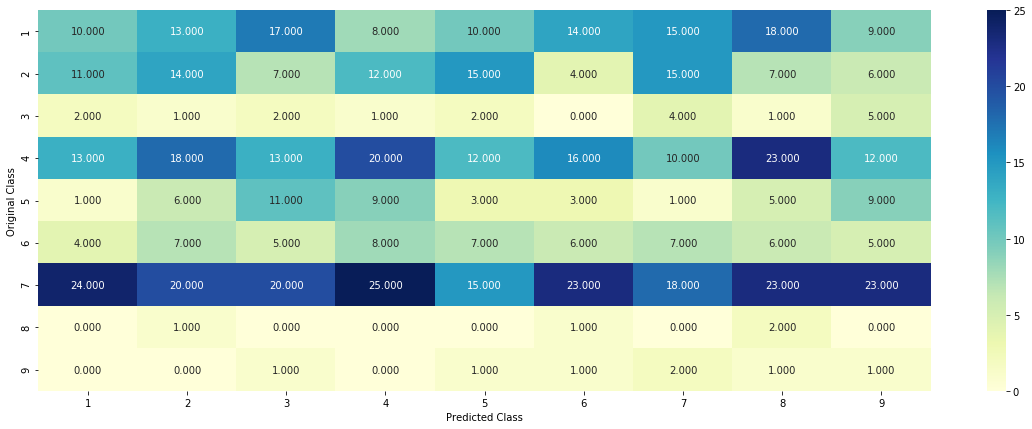

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


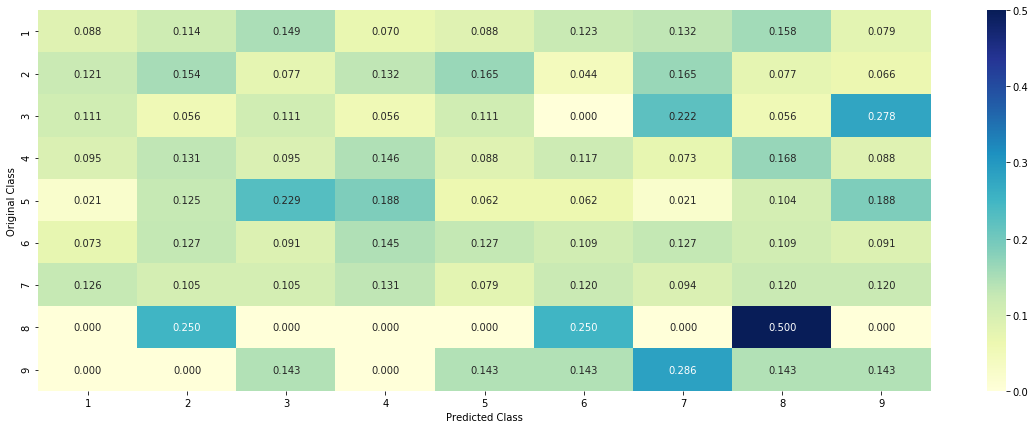

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


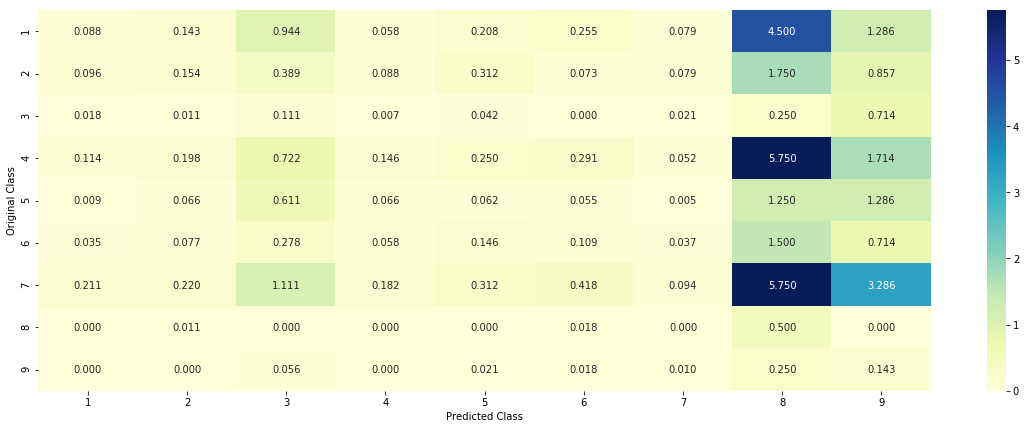

In [18]:
from sklearn.metrics.classification import log_loss
#Need to generate nine probabilities and sum of them is equal to 1.
#Solution is Generate Nine numbers and divide each of the numbers with their sum.
X_test_len = X_test.shape[0]
X_cv_len = X_cv.shape[0]

#We creat a output array that is exactly same as Cv data
y_cv_predicted = np.zeros((X_cv_len,9))
for i in range(X_cv_len):
    rand_probs = np.random.rand(1,9)
    y_cv_predicted[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation data using Random Model", log_loss(y_cv, y_cv_predicted, eps=1e-15))

# Test-Set error.
#we create a output array that has exactly same as the test data
y_test_predicted = np.zeros((X_test_len,9))
for i in range(X_test_len):
    rand_probs = np.random.rand(1,9)
    y_test_predicted[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, y_test_predicted, eps=1e-15))

y_predicted = np.argmax(y_test_predicted,axis=1)
plot_confusion_matrix(y_test, y_predicted+1)

### Univariate Analysis

In [19]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['X_train', 'X_test', 'X_cv']
# algorithm
# -----------------------------------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = X_train[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = X_train.loc[(X_train['Class']==k) & (X_train[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = X_train[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

### Univariate Analysis on Gene feature

**1. What Type of the Feature it is?**
* Categorical Feature

**2. How many Categories are there and How they are distributed?**

In [20]:
unique_genes = X_train['Gene'].value_counts()
print("Number of unique genes:", unique_genes.shape[0])
print(unique_genes.head(10)) #Prints Top 10 Most occuring genes.

Number of unique genes: 235
BRCA1     166
TP53      113
EGFR       94
BRCA2      86
PTEN       75
BRAF       64
KIT        61
ALK        46
PDGFRA     42
ERBB2      41
Name: Gene, dtype: int64


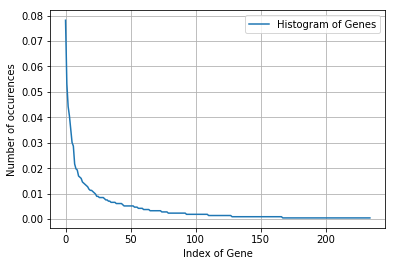

In [21]:
#Gene Distribution (Histogram)
s = sum(unique_genes.values)
h = unique_genes.values/s
plt.plot(h, label="Histogram of Genes")
plt.xlabel("Index of Gene")
plt.ylabel("Number of occurences")
plt.legend()
plt.grid()
plt.show()

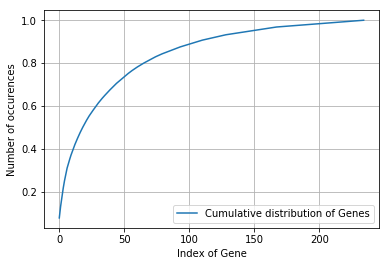

In [22]:
#Cummulative distribution of genes.
c = np.cumsum(h)
plt.plot(c, label='Cumulative distribution of Genes')
plt.xlabel("Index of Gene")
plt.ylabel("Number of occurences")
plt.grid()
plt.legend()
plt.show()

**3.How to Featurize this Gene feature?**
* One hot encoding.

We will choose the appropriate featurization based on the ML model we use. For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
#One hot encoding of the gene feature.
gene_vectorizer = CountVectorizer(binary=True)
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(X_train['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(X_cv['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(X_test['Gene'])

In [24]:
#Lets cross check the shape of the data frame
print("The shape of the train_gene_feature_onehotCoding", train_gene_feature_onehotCoding.shape)
print("The shape of the cv_gene_feature_onehotCoding", cv_gene_feature_onehotCoding.shape)
print("The shape of the test_gene_feature_onehotCoding", test_gene_feature_onehotCoding.shape)

The shape of the train_gene_feature_onehotCoding (2124, 234)
The shape of the cv_gene_feature_onehotCoding (532, 234)
The shape of the test_gene_feature_onehotCoding (665, 234)


**4.How good is this feature in predicting y_i's?**

There are Many ways to check it but simplest way is to build a simple Machine Learning Model.

For values of alpha =  1e-05 The log loss is: 1.357705840913466
For values of alpha =  0.0001 The log loss is: 1.1784846252919954
For values of alpha =  0.001 The log loss is: 1.1854554268770856
For values of alpha =  0.01 The log loss is: 1.3094221122073606
For values of alpha =  0.1 The log loss is: 1.4234788994992158
For values of alpha =  1 The log loss is: 1.4641875037518564


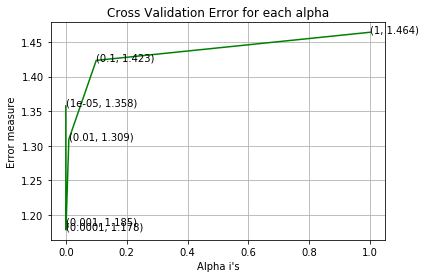

For values of best alpha =  0.0001 The train log loss is: 1.0318666430185068
For values of best alpha =  0.0001 The cross validation log loss is: 1.1784846252919954
For values of best alpha =  0.0001 The test log loss is: 1.2430861180320725


In [25]:
#SGD Classifier.
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings("ignore")
#Hyper parameter for SGD classifier
alpha = [10**x for x in range(-5,1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


**5. Gene Feature stable across all the dataset(Train,Test and CV)**
* Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error.

In [26]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=X_test[X_test['Gene'].isin(list(set(X_train['Gene'])))].shape[0]
cv_coverage=X_cv[X_cv['Gene'].isin(list(set(X_train['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',X_test.shape[0], ":",(test_coverage/X_test.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',X_cv.shape[0],":" ,(cv_coverage/X_cv.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  235  genes in train dataset?
Ans
1. In test data 645 out of 665 : 96.99248120300751
2. In cross validation data 518 out of  532 : 97.36842105263158


### Univariate analysis on Variation Feature

**Q1. What type of the Feature it is?**
* It is Categorical feature.

**Q2. How many Categories are there?**

In [27]:
unique_variations = X_train['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1926
Deletion                56
Truncating_Mutations    55
Amplification           44
Fusions                 26
Overexpression           4
G12V                     3
E542K                    2
T73I                     2
E330K                    2
Q61H                     2
Name: Variation, dtype: int64


In [28]:
print("Ans: There are", unique_variations.shape[0])

Ans: There are 1926


Different categories of variations in the train data, and they are distibuted as follows

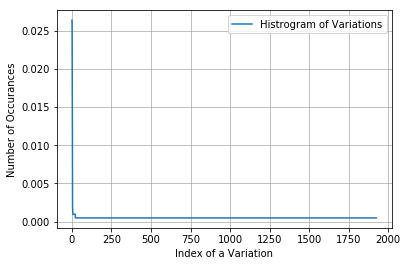

In [29]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02636535 0.05225989 0.07297552 ... 0.99905838 0.99952919 1.        ]


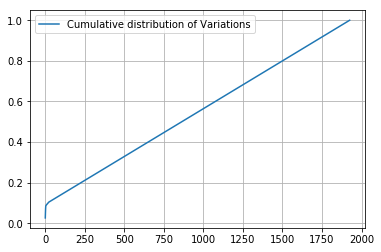

In [30]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

**Q3. How to featurize the Variation Feature?**
* Tfidf Vectorizer

We will use both of the methods to featurize variation feature.

In [31]:
# Tfidf Vectorizer of variation feature.
#from sklearn.feature_extraction.text import TfidfVectorizer

variation_countVectorizer = CountVectorizer(binary=True)
train_variation_feature_countVectorizer = variation_countVectorizer.fit_transform(X_train['Variation'])
test_variation_feature_countVectorizer = variation_countVectorizer.transform(X_test['Variation'])
cv_variation_feature_countVectorizer = variation_countVectorizer.transform(X_cv['Variation'])

In [32]:
print("The shape of train_variation_feature_countVectorizer is",train_variation_feature_countVectorizer.shape)
print("The shape of cv_variation_feature_countVectorizer is",cv_variation_feature_countVectorizer.shape)
print("The shape of test_variation_feature_countVectorizer is",test_variation_feature_countVectorizer.shape)

The shape of train_variation_feature_countVectorizer is (2124, 1960)
The shape of cv_variation_feature_countVectorizer is (532, 1960)
The shape of test_variation_feature_countVectorizer is (665, 1960)


**Q4. How good is that variation feature in predicting y_i's?**


For values of alpha =  1e-05 The log loss is: 1.7586806701786781
For values of alpha =  0.0001 The log loss is: 1.7495023558640366
For values of alpha =  0.001 The log loss is: 1.7491111314085426
For values of alpha =  0.01 The log loss is: 1.7578468890793517
For values of alpha =  0.1 The log loss is: 1.7569119528524137
For values of alpha =  1 The log loss is: 1.7584169751647492


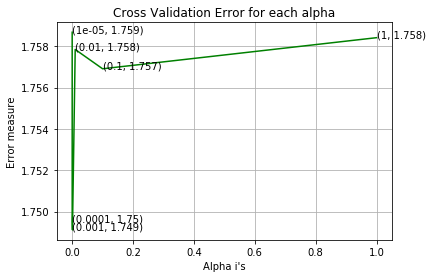

For values of best alpha =  0.001 The train log loss is: 1.0646005594116628
For values of best alpha =  0.001 The cross validation log loss is: 1.7491111314085426
For values of best alpha =  0.001 The test log loss is: 1.6950028011143448


In [33]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_countVectorizer, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_countVectorizer, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_countVectorizer)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_countVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_countVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


**Observation:**
* Log loss is less than Random models log loss which is 2.5
* This Feature is useful. 

**Q5. Is this Variation is Stable across all the Data sets(Train, CV and Test)?**

In [34]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=X_test[X_test['Variation'].isin(list(set(X_train['Variation'])))].shape[0]
cv_coverage=X_cv[X_cv['Variation'].isin(list(set(X_train['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',X_test.shape[0], ":",(test_coverage/X_test.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',X_cv.shape[0],":" ,(cv_coverage/X_cv.shape[0])*100)

Q12. How many data points are covered by total  1926  genes in test and cross validation data sets?
Ans
1. In test data 75 out of 665 : 11.278195488721805
2. In cross validation data 43 out of  532 : 8.082706766917292


**Observation:**
* Around 10% of the data is common between Train and CV and also Train and Test.
* This feature is less stable but it is useful feature.

### Univariate Analysis on Text data

**Q1. How Many Words are there in Train data?**

**Q2. How are Words frequencies distributed?**

**Q3. How to featurize the Text data?**

**Q4. Is the Text feature is useful in predicting y_i's?**

**Q5. Is the Text Feature stable across Train, cv and Test?**

In [35]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word
from collections import defaultdict

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['Text'].split():
            dictionary[word] +=1
    return dictionary

In [36]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['Text'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['Text'].split()))
            row_index += 1
    return text_feature_responseCoding

In [38]:
# building a CountVectorizer with all the words that occured atleast 3 times in train data
text_countVectorizer = CountVectorizer(min_df=5,binary=True)
train_text_feature_countVectorizer = text_countVectorizer.fit_transform(X_train['Text'])
# getting all the feature names (words)
train_text_features= text_countVectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_countVectorizer.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 32168


In [39]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = X_train[X_train['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(X_train)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [40]:
from sklearn.preprocessing import normalize
# don't forget to normalize every feature
#train_text_feature_countVectorizer = normalize(train_text_feature_countVectorizer, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_countVectorizer = text_countVectorizer.transform(X_test['Text'])
# don't forget to normalize every feature
#test_text_feature_countVectorizer = normalize(test_text_feature_countVectorizer, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_countVectorizer = text_countVectorizer.transform(X_cv['Text'])
# don't forget to normalize every feature
#cv_text_feature_countVectorizer = normalize(cv_text_feature_countVectorizer, axis=0)

In [41]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [42]:
# Number of words for a given frequency.
from collections import Counter
print(Counter(sorted_text_occur))

Counter({5: 3665, 6: 2947, 7: 2320, 8: 2129, 9: 1450, 12: 1358, 10: 1334, 11: 984, 13: 976, 16: 670, 14: 603, 17: 598, 15: 579, 25: 416, 18: 401, 19: 345, 23: 324, 45: 302, 20: 297, 22: 288, 21: 281, 42: 245, 24: 238, 28: 234, 26: 231, 27: 212, 32: 181, 29: 181, 31: 158, 30: 157, 34: 152, 33: 141, 36: 124, 35: 121, 37: 119, 46: 113, 47: 106, 41: 104, 48: 102, 43: 100, 38: 100, 55: 98, 39: 95, 44: 91, 50: 90, 40: 88, 49: 87, 71: 81, 51: 79, 56: 75, 53: 75, 52: 71, 54: 68, 64: 65, 57: 62, 66: 57, 60: 56, 58: 56, 62: 55, 59: 55, 70: 54, 68: 53, 72: 52, 67: 51, 63: 51, 65: 50, 61: 49, 75: 45, 74: 45, 77: 41, 76: 41, 69: 41, 100: 39, 91: 37, 73: 36, 89: 35, 86: 34, 85: 34, 81: 34, 79: 34, 84: 33, 78: 32, 94: 30, 87: 29, 101: 28, 93: 28, 90: 28, 83: 28, 80: 28, 110: 27, 95: 27, 92: 27, 88: 27, 82: 27, 105: 26, 120: 25, 103: 25, 96: 25, 109: 24, 99: 24, 97: 24, 131: 22, 114: 22, 108: 22, 107: 22, 104: 22, 102: 22, 129: 21, 124: 21, 112: 21, 111: 21, 106: 21, 142: 20, 118: 20, 117: 20, 113: 20

For values of alpha =  1e-05 The log loss is: 1.1345267460263098
For values of alpha =  0.0001 The log loss is: 1.134019406988213
For values of alpha =  0.001 The log loss is: 1.1436417047409133
For values of alpha =  0.01 The log loss is: 1.136524936215198
For values of alpha =  0.1 The log loss is: 1.0622143297266315
For values of alpha =  1 The log loss is: 1.2062638209213732


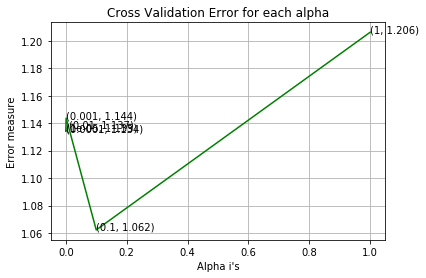

For values of best alpha =  0.1 The train log loss is: 0.6707950164930825
For values of best alpha =  0.1 The cross validation log loss is: 1.0622143297266315
For values of best alpha =  0.1 The test log loss is: 1.059601536668851


In [43]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_countVectorizer, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_countVectorizer, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_countVectorizer)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_countVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_countVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


**Q. Is the Text feature stable across all the data sets (Test, Train, Cross validation)?**

In [44]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=5,binary=True)
    df_text_fea = df_text_vec.fit_transform(df['Text'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [45]:
len1,len2 = get_intersec_text(X_test)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(X_cv)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

98.408 % of word of test data appeared in train data
99.597 % of word of Cross Validation appeared in train data


**Observation:**
* The text feature is Stable.

### Machine Learning Models

In [46]:
#Data preparation for ML models.

#Misc. functionns for ML models

def predict_and_plot_confusion_matrix(train_x, train_y, test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [47]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [48]:
# This function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer(binary=True)
    var_count_vec = CountVectorizer(binary=True)
    text_count_vec = CountVectorizer(min_df=5,binary=True)
    
    gene_vec = gene_count_vec.fit(X_train['Gene'])
    var_vec  = var_count_vec.fit(X_train['Variation'])
    text_vec = text_count_vec.fit(X_train['Text'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

### Stacking Three Features

In [49]:
from scipy.sparse import hstack
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

#onehot encoding
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_countVectorizer))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_countVectorizer))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_countVectorizer))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_countVectorizer)).tocsr()
train_y = np.array(list(X_train['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_countVectorizer)).tocsr()
test_y = np.array(list(X_test['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_countVectorizer)).tocsr()
cv_y = np.array(list(X_cv['Class']))


In [50]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 34362)
(number of data points * number of features) in test data =  (665, 34362)
(number of data points * number of features) in cross validation data = (532, 34362)


### BaseLine Models

### Naive Bayes

#### Hyperparameter Tuning:

for alpha = 1e-05
Log Loss : 1.2959456660509876
for alpha = 0.0001
Log Loss : 1.2944598744062286
for alpha = 0.001
Log Loss : 1.2863075915357112
for alpha = 0.1
Log Loss : 1.2857292405039373
for alpha = 1
Log Loss : 1.3654107322739317
for alpha = 10
Log Loss : 1.6317694264138467
for alpha = 100
Log Loss : 1.8203145190804606
for alpha = 1000
Log Loss : 1.8251558446597982


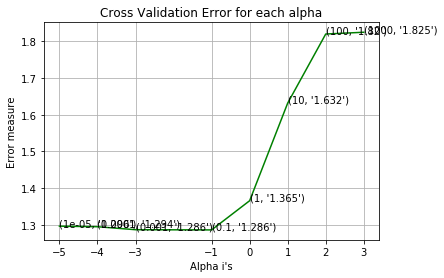

For values of best alpha =  0.1 The train log loss is: 0.9874006846990316
For values of best alpha =  0.1 The cross validation log loss is: 1.2857292405039373
For values of best alpha =  0.1 The test log loss is: 1.3085106760675254


In [51]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
from sklearn.naive_bayes import MultinomialNB

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


#### Testing Model with best HyperParameter

Log Loss : 1.2857292405039373
Number of missclassified point : 0.4041353383458647
-------------------------------------------------- Confusion Matrix --------------------------------------------------


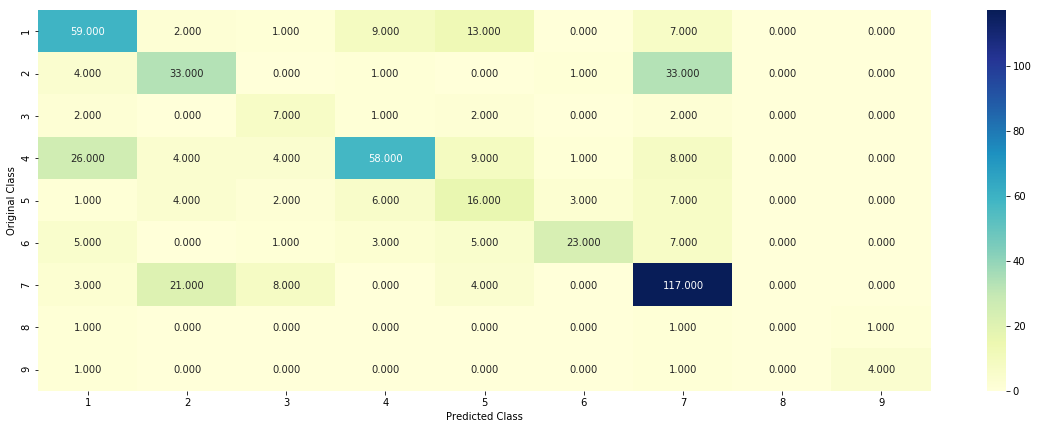

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


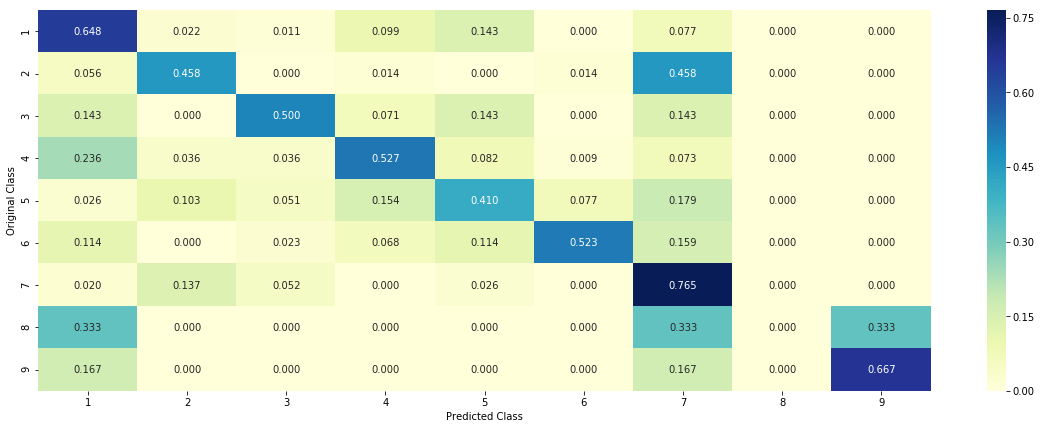

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


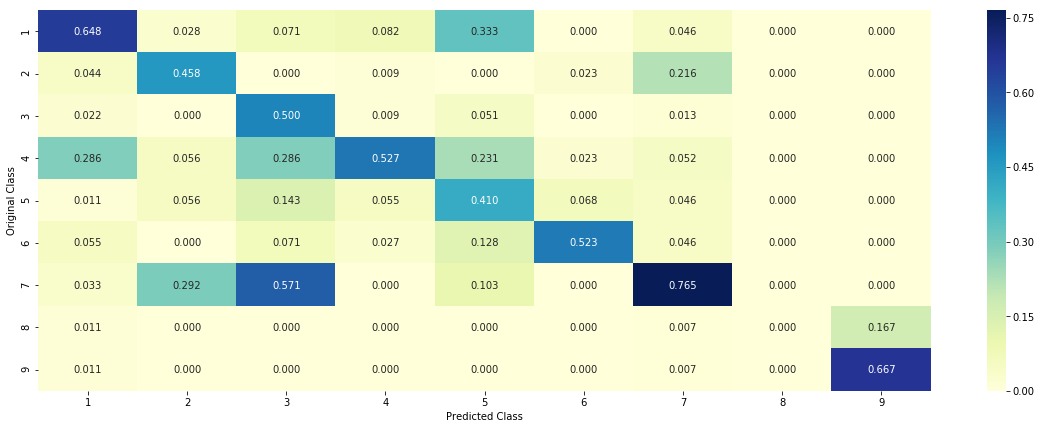

In [52]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

#### Feature Importance, Query Point-1

In [53]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0895 0.0828 0.0106 0.1163 0.0389 0.038  0.6152 0.0048 0.0038]]
Actual Class : 7
--------------------------------------------------
0 Text feature [express] present in test data point [True]
1 Text feature [result] present in test data point [True]
2 Text feature [activ] present in test data point [True]
3 Text feature [use] present in test data point [True]
4 Text feature [also] present in test data point [True]
5 Text feature [cell] present in test data point [True]
6 Text feature [studi] present in test data point [True]
7 Text feature [mutat] present in test data point [True]
8 Text feature [protein] present in test data point [True]
9 Text feature [addit] present in test data point [True]
10 Text feature [data] present in test data point [True]
11 Text feature [identifi] present in test data point [True]
12 Text feature [previous] present in test data point [True]
13 Text feature [12] present in test data point [True]
14 Text f

#### Feature Importance, Query Point-2

In [54]:
test_point_index = 130
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0895 0.0828 0.0106 0.1163 0.0389 0.038  0.6152 0.0048 0.0038]]
Actual Class : 7
--------------------------------------------------
0 Text feature [express] present in test data point [True]
1 Text feature [result] present in test data point [True]
2 Text feature [activ] present in test data point [True]
3 Text feature [use] present in test data point [True]
4 Text feature [also] present in test data point [True]
5 Text feature [cell] present in test data point [True]
6 Text feature [studi] present in test data point [True]
7 Text feature [mutat] present in test data point [True]
8 Text feature [protein] present in test data point [True]
9 Text feature [addit] present in test data point [True]
10 Text feature [data] present in test data point [True]
11 Text feature [identifi] present in test data point [True]
12 Text feature [previous] present in test data point [True]
13 Text feature [12] present in test data point [True]
14 Text f

### K-Nearest Neighbour Classifier

#### HyperParameter Tuning

for alpha = 5
Log Loss : 1.2341414023831565
for alpha = 11
Log Loss : 1.2898353072491722
for alpha = 15
Log Loss : 1.2982019073761313
for alpha = 21
Log Loss : 1.3028363069114284
for alpha = 31
Log Loss : 1.3237770366899029
for alpha = 41
Log Loss : 1.3345635273906078
for alpha = 51
Log Loss : 1.356833858910177
for alpha = 99
Log Loss : 1.424279893666141


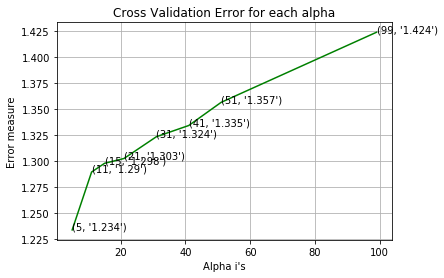

For values of best alpha =  5 The train log loss is: 0.9981826846715494
For values of best alpha =  5 The cross validation log loss is: 1.2341414023831565
For values of best alpha =  5 The test log loss is: 1.2783375925022196


In [55]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification.
from sklearn.neighbors import KNeighborsClassifier
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


#### Testing the Model with best hyperparameter

Log loss : 1.2341414023831565
Number of mis-classified points : 0.4041353383458647
-------------------------------------------------- Confusion Matrix --------------------------------------------------


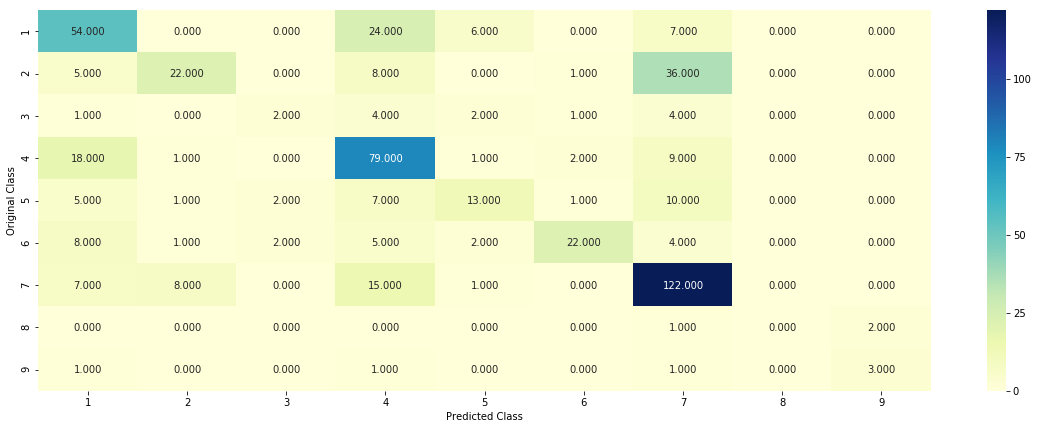

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


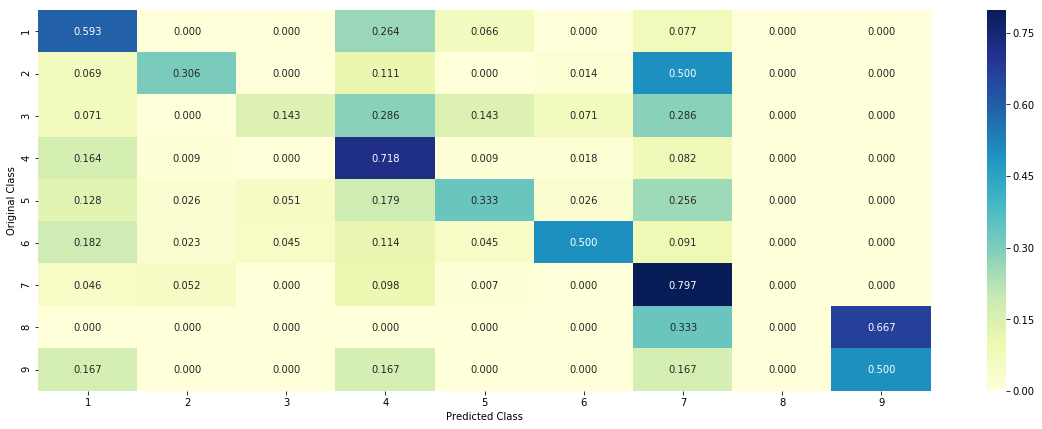

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


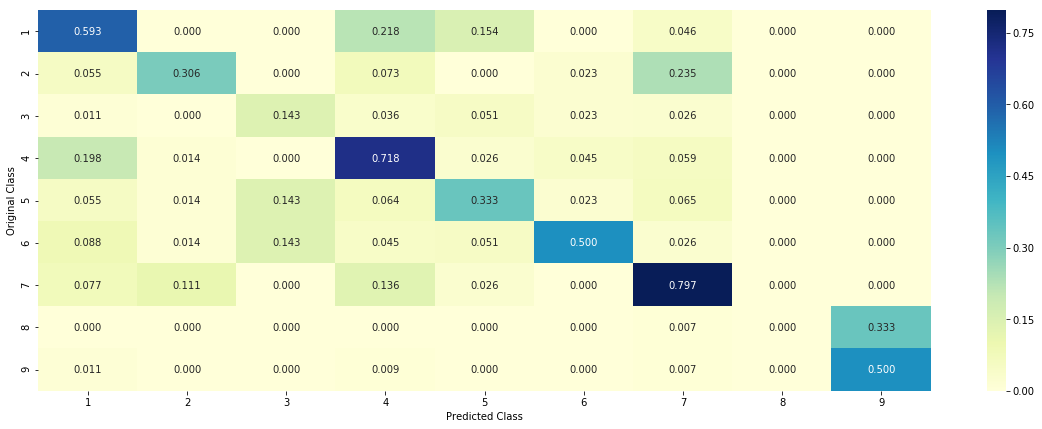

In [56]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#---------------------------------------------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

#### Sample Query Point-1

In [57]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_onehotCoding[test_point_index], alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 7
The  5  nearest neighbours of the test points belongs to classes [7 7 7 7 7]
Fequency of nearest points : Counter({7: 5})


#### Sample Query Point-2

In [58]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_onehotCoding[test_point_index], alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 4
Actual Class : 1
the k value for knn is 5 and the nearest neighbours of the test points belongs to classes [5 1 4 4 5]
Fequency of nearest points : Counter({5: 2, 4: 2, 1: 1})


### Logistic Regression(With Class balancing)

#### HyperParameter Tuning

for alpha = 1e-06
Log Loss : 1.161173953017622
for alpha = 1e-05
Log Loss : 1.1412037100467751
for alpha = 0.0001
Log Loss : 1.1666632528166725
for alpha = 0.001
Log Loss : 1.1594941987007956
for alpha = 0.01
Log Loss : 1.1247128002388955
for alpha = 0.1
Log Loss : 1.0583902596518941
for alpha = 1
Log Loss : 1.1791896357259222
for alpha = 10
Log Loss : 1.687966077274203
for alpha = 100
Log Loss : 1.8108929098275715


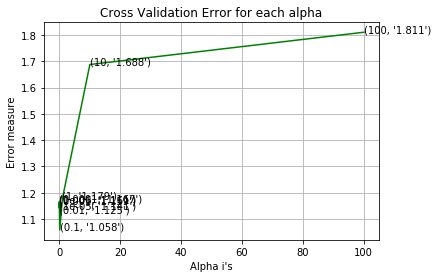

For values of best alpha =  0.1 The train log loss is: 0.6686735423914442
For values of best alpha =  0.1 The cross validation log loss is: 1.0583902596518941
For values of best alpha =  0.1 The test log loss is: 1.0502489475359307


In [59]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# -------------------------------------------------------------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------------------------------------------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#---------------------------------------------------------------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing the Model with best hyperParameter

Log loss : 1.0583902596518941
Number of mis-classified points : 0.3458646616541353
-------------------------------------------------- Confusion Matrix --------------------------------------------------


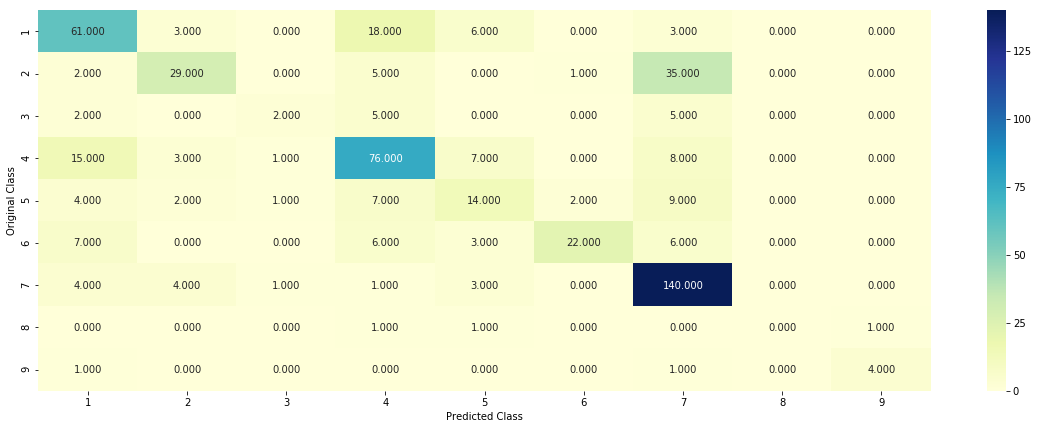

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


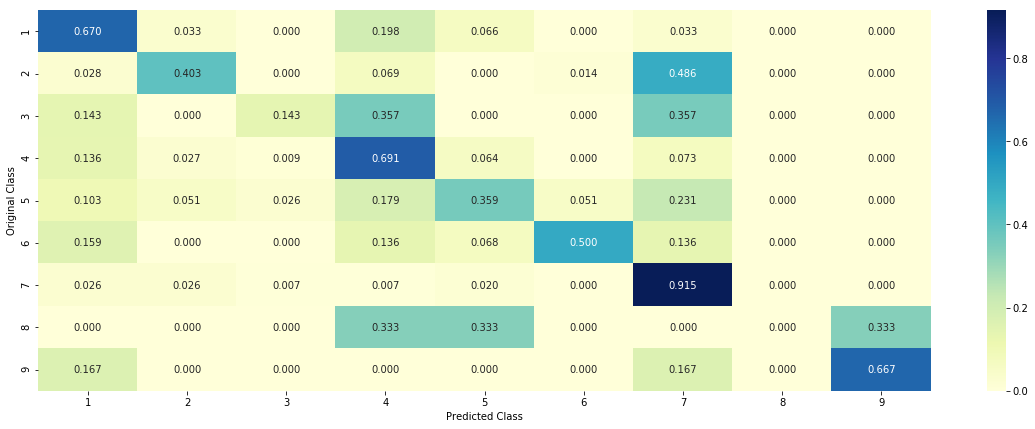

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


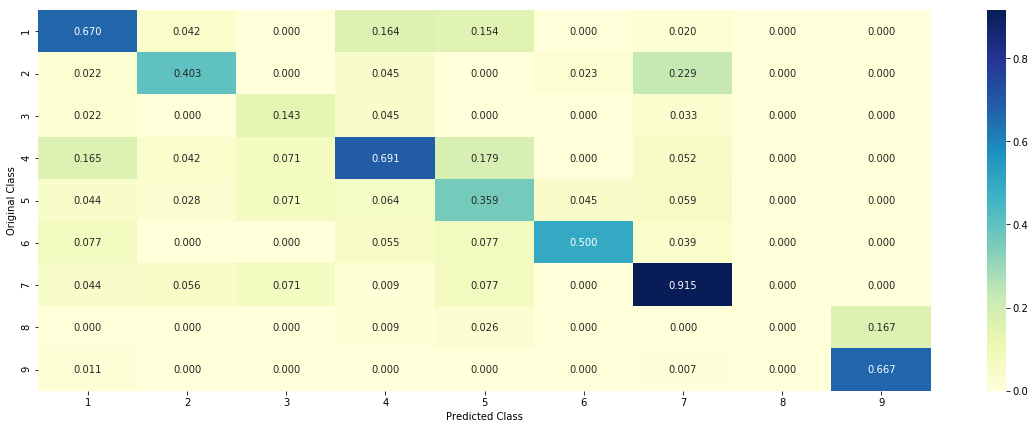

In [60]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)
# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

#### Feature Importance

In [61]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

#### Incorrectly Classified Point

In [62]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.1627 0.0423 0.0641 0.1669 0.4391 0.1062 0.0102 0.0057 0.0029]]
Actual Class : 1
--------------------------------------------------
0 Text feature [need] present in test data point [True]
1 Text feature [neutral] present in test data point [True]
3 Text feature [reason] present in test data point [True]
5 Text feature [39] present in test data point [True]
8 Text feature [41] present in test data point [True]
13 Text feature [featur] present in test data point [True]
15 Text feature [compon] present in test data point [True]
18 Text feature [ref] present in test data point [True]
21 Text feature [aim] present in test data point [True]
22 Text feature [ovarian] present in test data point [True]
26 Text feature [insight] present in test data point [True]
28 Text feature [avail] present in test data point [True]
29 Text feature [low] present in test data point [True]
30 Text feature [quantit] present in test data point [True]
31 Text f

451 Text feature [physicochem] present in test data point [True]
452 Text feature [alloc] present in test data point [True]
454 Text feature [final] present in test data point [True]
460 Text feature [diseas] present in test data point [True]
461 Text feature [duplic] present in test data point [True]
471 Text feature [germlin] present in test data point [True]
474 Text feature [gastric] present in test data point [True]
475 Text feature [problem] present in test data point [True]
480 Text feature [incomplet] present in test data point [True]
482 Text feature [counsel] present in test data point [True]
486 Text feature [atg] present in test data point [True]
490 Text feature [genom] present in test data point [True]
Out of the top  500  features  148 are present in query point


#### Correctly Classified Point

In [63]:
test_point_index = 500
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.5717 0.0392 0.0119 0.1844 0.0328 0.0546 0.0885 0.0081 0.0089]]
Actual Class : 1
--------------------------------------------------
5 Text feature [defect] present in test data point [True]
6 Text feature [process] present in test data point [True]
7 Text feature [strand] present in test data point [True]
8 Text feature [cluster] present in test data point [True]
12 Text feature [mrna] present in test data point [True]
14 Text feature [silenc] present in test data point [True]
15 Text feature [1g] present in test data point [True]
16 Text feature [via] present in test data point [True]
19 Text feature [expo] present in test data point [True]
21 Text feature [modif] present in test data point [True]
22 Text feature [recogn] present in test data point [True]
25 Text feature [modul] present in test data point [True]
27 Text feature [extend] present in test data point [True]
30 Text feature [incub] present in test data point [True]
32 T

### Logistic Regression(Without Class balancing) 

#### HyperParameter Tuning

for alpha = 1e-06
Log Loss : 1.1379406122363147
for alpha = 1e-05
Log Loss : 1.1373417643711274
for alpha = 0.0001
Log Loss : 1.1276751211335387
for alpha = 0.001
Log Loss : 1.1324027818964664
for alpha = 0.01
Log Loss : 1.1281263640200623
for alpha = 0.1
Log Loss : 1.0592511241113731
for alpha = 1
Log Loss : 1.2044442622846885


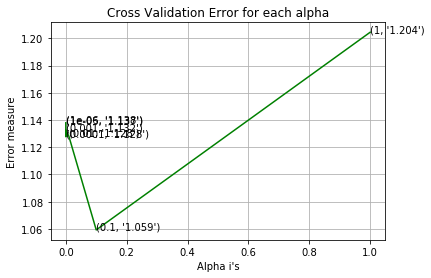

For values of best alpha =  0.1 The train log loss is: 0.6670622052322578
For values of best alpha =  0.1 The cross validation log loss is: 1.0592511241113731
For values of best alpha =  0.1 The test log loss is: 1.0564568355581023


In [64]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing Model with best HyperParameter

Log loss : 1.0592511241113731
Number of mis-classified points : 0.34774436090225563
-------------------------------------------------- Confusion Matrix --------------------------------------------------


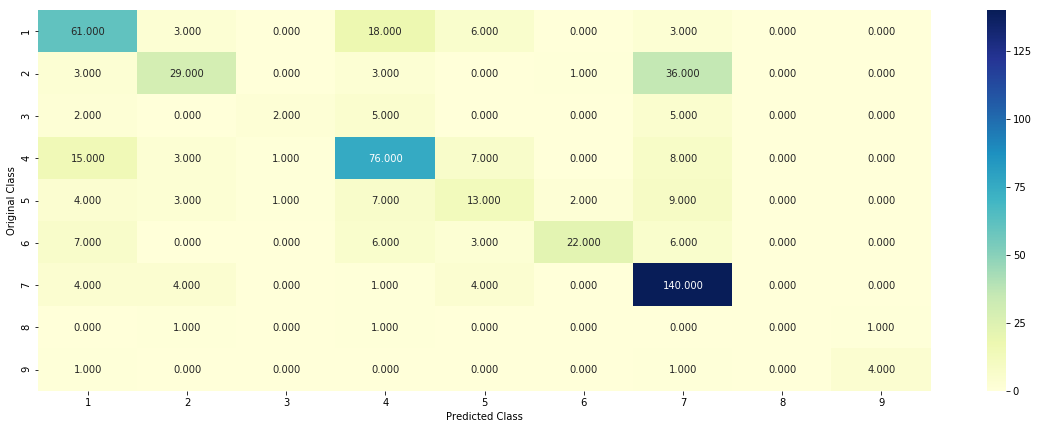

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


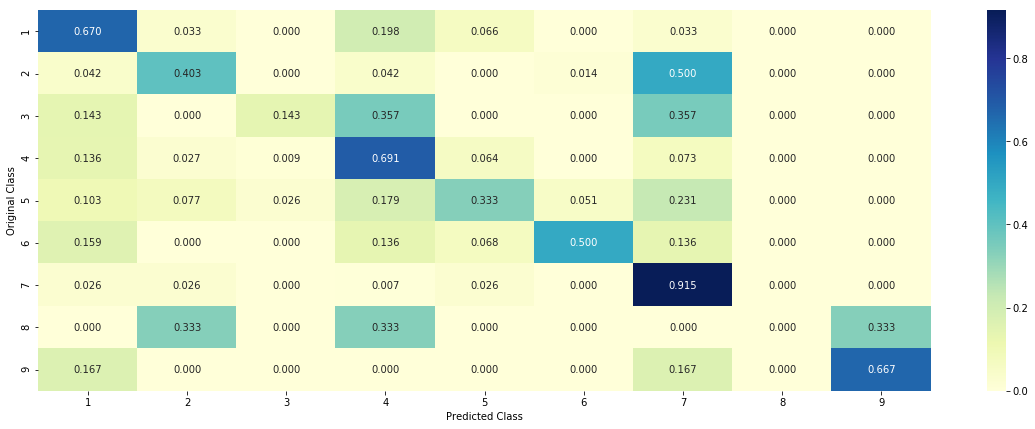

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


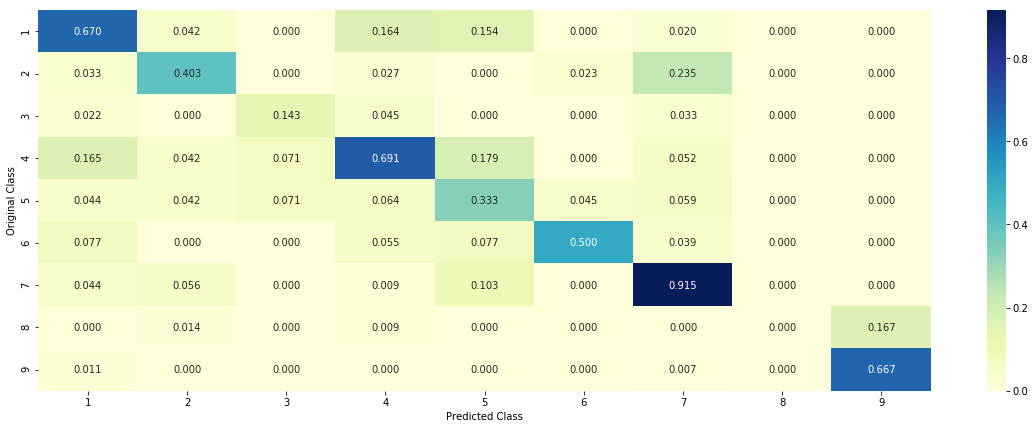

In [65]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.
#------------------------------------------------------------------------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

#### Feature Importance, Query Point-1

In [66]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[2.580e-02 4.530e-02 1.300e-03 3.090e-02 5.000e-03 6.300e-03 8.816e-01
  3.000e-03 8.000e-04]]
Actual Class : 7
--------------------------------------------------
0 Text feature [regulatori] present in test data point [True]
1 Text feature [3t3] present in test data point [True]
2 Text feature [tyrosin] present in test data point [True]
3 Text feature [phosphoryl] present in test data point [True]
8 Text feature [kina] present in test data point [True]
9 Text feature [constitut] present in test data point [True]
10 Text feature [absenc] present in test data point [True]
14 Text feature [oncogen] present in test data point [True]
15 Text feature [murin] present in test data point [True]
16 Text feature [transform] present in test data point [True]
18 Text feature [slight] present in test data point [True]
19 Text feature [therapeut] present in test data point [True]
20 Text feature [downstream] present in test data point [True]
21 Text

#### Feature Importance, Query Point-2

In [67]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.1411 0.0381 0.0452 0.2088 0.4312 0.1141 0.0113 0.0062 0.0041]]
Actual Class : 1
--------------------------------------------------
0 Text feature [need] present in test data point [True]
1 Text feature [neutral] present in test data point [True]
3 Text feature [reason] present in test data point [True]
6 Text feature [ovarian] present in test data point [True]
9 Text feature [41] present in test data point [True]
10 Text feature [39] present in test data point [True]
11 Text feature [ref] present in test data point [True]
15 Text feature [aim] present in test data point [True]
16 Text feature [ensur] present in test data point [True]
23 Text feature [stringent] present in test data point [True]
31 Text feature [compon] present in test data point [True]
32 Text feature [featur] present in test data point [True]
33 Text feature [onset] present in test data point [True]
35 Text feature [quantit] present in test data point [True]
37 Te

432 Text feature [larg] present in test data point [True]
441 Text feature [germlin] present in test data point [True]
445 Text feature [implement] present in test data point [True]
446 Text feature [rational] present in test data point [True]
451 Text feature [meta] present in test data point [True]
452 Text feature [duplic] present in test data point [True]
461 Text feature [evalu] present in test data point [True]
466 Text feature [combin] present in test data point [True]
469 Text feature [calibr] present in test data point [True]
482 Text feature [atg] present in test data point [True]
487 Text feature [differenti] present in test data point [True]
Out of the top  500  features  146 are present in query point


### Linear SVM

#### HyperParameter Tuning

for C = 1e-05
Log Loss : 1.1253975622446681
for C = 0.0001
Log Loss : 1.148689029549208
for C = 0.001
Log Loss : 1.1595628247330148
for C = 0.01
Log Loss : 1.1370494471082992
for C = 0.1
Log Loss : 1.11452709864372
for C = 1
Log Loss : 1.1802820359479103
for C = 10
Log Loss : 1.5236789572088019
for C = 100
Log Loss : 1.8073016539001354


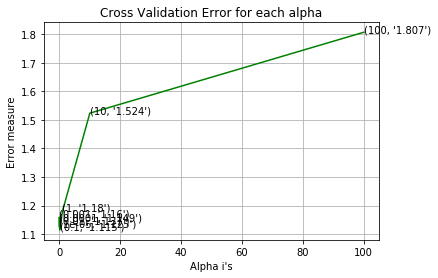

For values of best alpha =  0.1 The train log loss is: 0.7047827279044722
For values of best alpha =  0.1 The cross validation log loss is: 1.11452709864372
For values of best alpha =  0.1 The test log loss is: 1.1093842502187545


In [68]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# -----------------------------------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#----------------------------------------------------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing Model with best HyperParameter

Log loss : 1.11452709864372
Number of mis-classified points : 0.3609022556390977
-------------------------------------------------- Confusion Matrix --------------------------------------------------


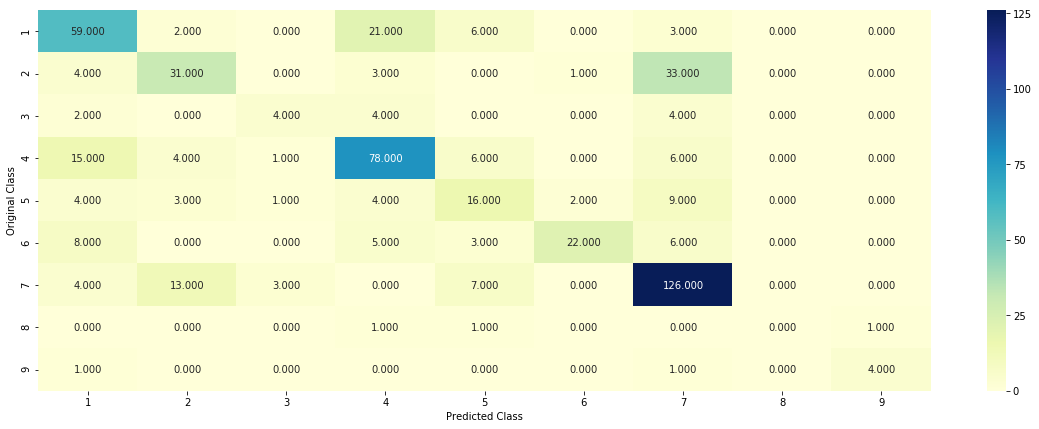

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


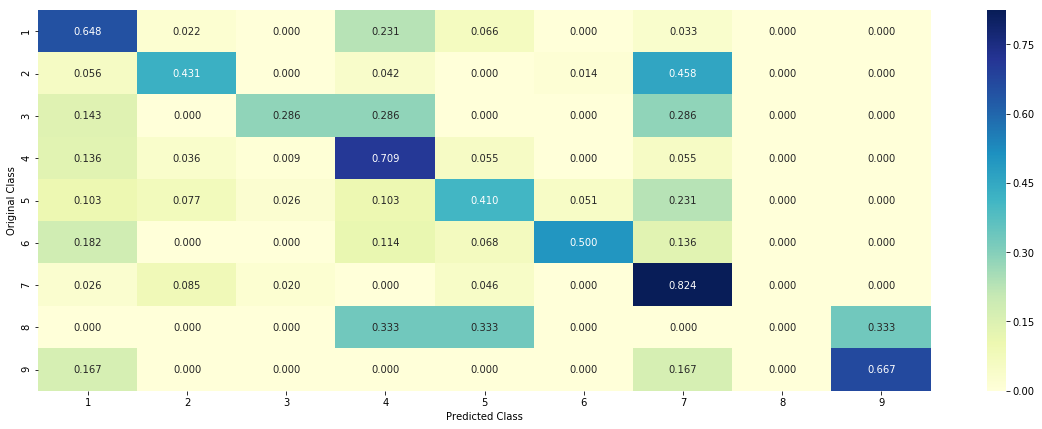

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


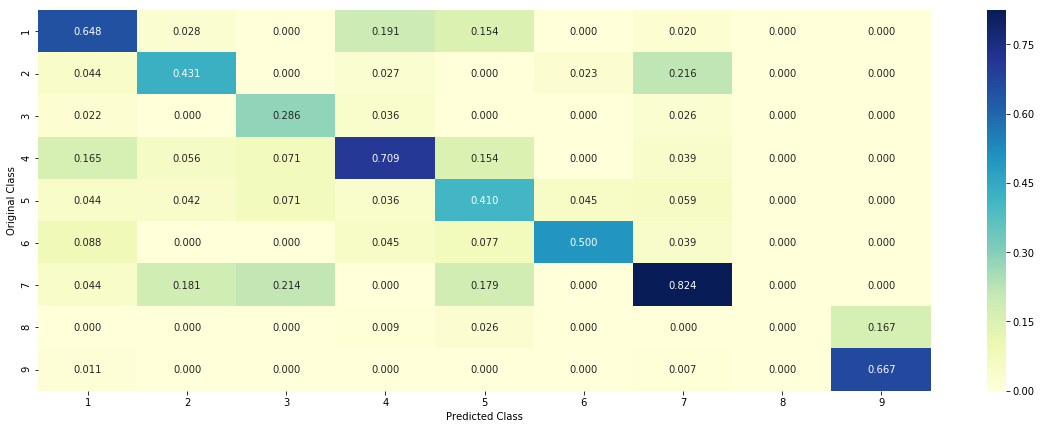

In [69]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.

# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

#### Feature Importance, Correctly Classified Point

In [70]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
#test_point_index = 1
test_point_index = 160
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.0901 0.0727 0.069  0.1832 0.4222 0.0926 0.0589 0.0069 0.0044]]
Actual Class : 5
--------------------------------------------------
0 Text feature [need] present in test data point [True]
1 Text feature [support] present in test data point [True]
3 Text feature [make] present in test data point [True]
7 Text feature [avail] present in test data point [True]
8 Text feature [compon] present in test data point [True]
9 Text feature [ad] present in test data point [True]
12 Text feature [ref] present in test data point [True]
14 Text feature [clear] present in test data point [True]
15 Text feature [2a] present in test data point [True]
16 Text feature [promot] present in test data point [True]
17 Text feature [low] present in test data point [True]
18 Text feature [featur] present in test data point [True]
19 Text feature [2b] present in test data point [True]
20 Text feature [difficulti] present in test data point [True]
21 Text featu

483 Text feature [brca1] present in test data point [True]
484 Text feature [breast] present in test data point [True]
492 Text feature [notabl] present in test data point [True]
495 Text feature [diagnost] present in test data point [True]
496 Text feature [robust] present in test data point [True]
498 Text feature [alreadi] present in test data point [True]
499 Text feature [mani] present in test data point [True]
Out of the top  500  features  144 are present in query point


#### Incorrectly classified point

In [71]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.0896 0.0727 0.0693 0.1844 0.4216 0.0923 0.0589 0.0069 0.0044]]
Actual Class : 1
--------------------------------------------------
0 Text feature [need] present in test data point [True]
1 Text feature [support] present in test data point [True]
3 Text feature [make] present in test data point [True]
7 Text feature [avail] present in test data point [True]
8 Text feature [compon] present in test data point [True]
9 Text feature [ad] present in test data point [True]
12 Text feature [ref] present in test data point [True]
14 Text feature [clear] present in test data point [True]
15 Text feature [2a] present in test data point [True]
16 Text feature [promot] present in test data point [True]
17 Text feature [low] present in test data point [True]
18 Text feature [featur] present in test data point [True]
19 Text feature [2b] present in test data point [True]
20 Text feature [difficulti] present in test data point [True]
21 Text featu

483 Text feature [brca1] present in test data point [True]
484 Text feature [breast] present in test data point [True]
492 Text feature [notabl] present in test data point [True]
495 Text feature [diagnost] present in test data point [True]
496 Text feature [robust] present in test data point [True]
498 Text feature [alreadi] present in test data point [True]
499 Text feature [mani] present in test data point [True]
Out of the top  500  features  144 are present in query point


### Random Forest Classifier

#### HyperParameter Tuning

In [72]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature)

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
#-------------------------------------
from sklearn.ensemble import RandomForestClassifier
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2217753346128386
for n_estimators = 100 and max depth =  10
Log Loss : 1.100762499208743
for n_estimators = 200 and max depth =  5
Log Loss : 1.213591764916068
for n_estimators = 200 and max depth =  10
Log Loss : 1.0992994791922246
for n_estimators = 500 and max depth =  5
Log Loss : 1.200600073871657
for n_estimators = 500 and max depth =  10
Log Loss : 1.0948079890856297
for n_estimators = 1000 and max depth =  5
Log Loss : 1.1942521659226615
for n_estimators = 1000 and max depth =  10
Log Loss : 1.0935326566319816
for n_estimators = 2000 and max depth =  5
Log Loss : 1.1944444252351916
for n_estimators = 2000 and max depth =  10
Log Loss : 1.0942309434879731
For values of best estimator =  1000 The train log loss is: 0.7331829148071487
For values of best estimator =  1000 The cross validation log loss is: 1.0935326566319816
For values of best estimator =  1000 The test log loss is: 1.108308130593334


#### Testing the Model with best HyperParameter

Log loss : 1.0935326318925291
Number of mis-classified points : 0.35526315789473684
-------------------------------------------------- Confusion Matrix --------------------------------------------------


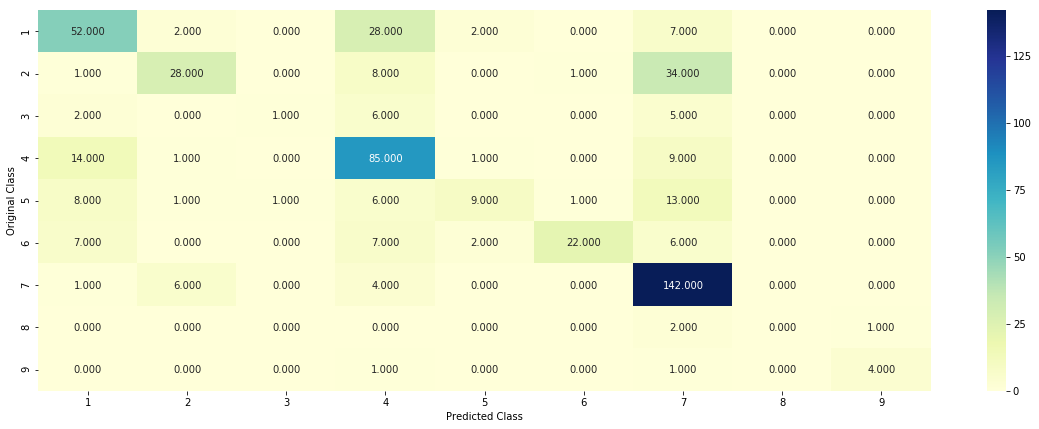

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


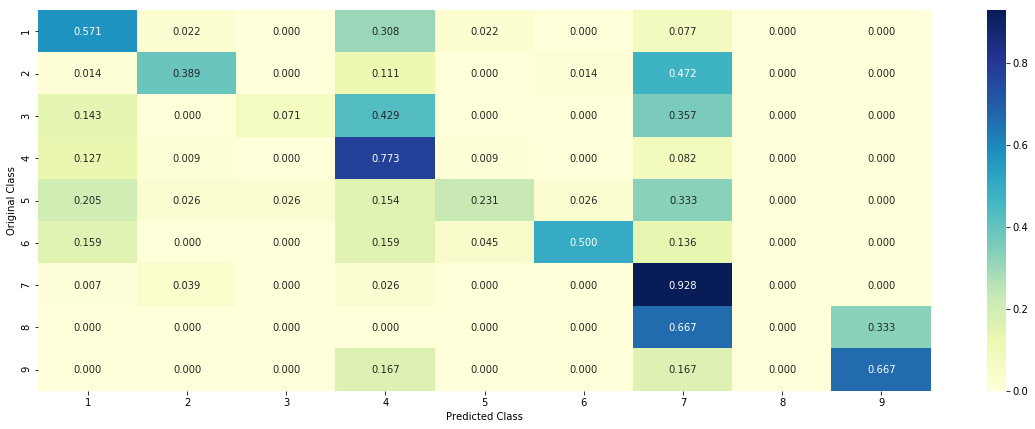

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


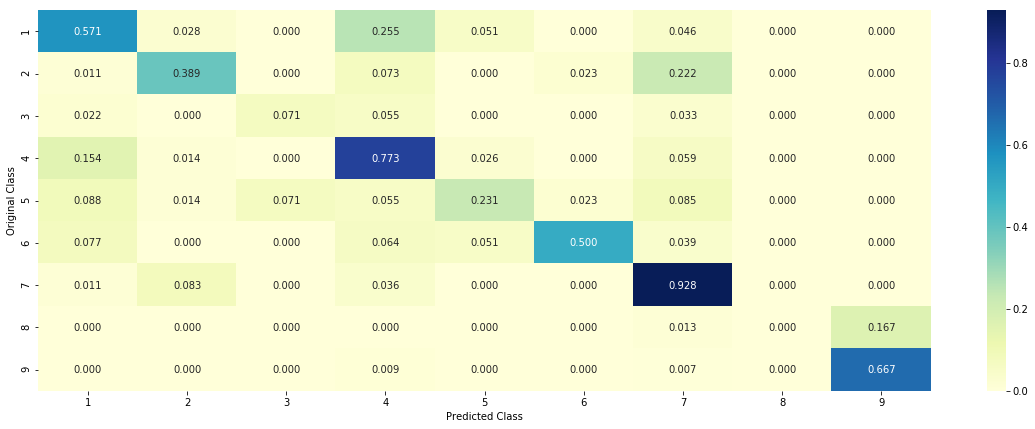

In [73]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

#### Feature Importance, Correctly classified Point

In [74]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], X_test['Text'].iloc[test_point_index], X_test['Gene'].iloc[test_point_index], X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0696 0.0648 0.013  0.0417 0.0331 0.0305 0.7388 0.0041 0.0044]]
Actual Class : 7
--------------------------------------------------
1 Text feature [3t3] present in test data point [True]
2 Text feature [receptor] present in test data point [True]
3 Text feature [tyrosin] present in test data point [True]
7 Text feature [oncogen] present in test data point [True]
8 Text feature [respond] present in test data point [True]
11 Text feature [kina] present in test data point [True]
13 Text feature [frameshift] present in test data point [True]
15 Text feature [ba] present in test data point [True]
20 Text feature [therapeut] present in test data point [True]
24 Text feature [missens] present in test data point [True]
28 Text feature [therapi] present in test data point [True]
29 Text feature [suppressor] present in test data point [True]
31 Text feature [f3] present in test data point [True]
35 Text feature [phosphoryl] present in test da

#### Incorrectly Classified Point

In [75]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index], X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.3083 0.0328 0.0219 0.3613 0.1837 0.0586 0.0231 0.0051 0.0052]]
Actuall Class : 1
--------------------------------------------------
10 Text feature [nonsens] present in test data point [True]
13 Text feature [frameshift] present in test data point [True]
21 Text feature [deleteri] present in test data point [True]
23 Text feature [brca1] present in test data point [True]
24 Text feature [missens] present in test data point [True]
33 Text feature [iarc] present in test data point [True]
34 Text feature [brca2] present in test data point [True]
40 Text feature [truncat] present in test data point [True]
42 Text feature [treatment] present in test data point [True]
44 Text feature [repair] present in test data point [True]
47 Text feature [cosegreg] present in test data point [True]
52 Text feature [month] present in test data point [True]
67 Text feature [pathogen] present in test data point [True]
72 Text feature [constitut] present

### Stack the Model

#### HyperParameter Tuning

In [76]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#------------------------------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# -------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding,train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.17
Support vector machines : Log Loss: 1.19
Naive Bayes : Log Loss: 1.29
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.179
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.044
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.555
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.141
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.119
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.221


#### Testing Model with best HyperParameter

Log loss (train) on the stacking classifier : 0.736667072654329
Log loss (CV) on the stacking classifier : 1.141309448880345
Log loss (test) on the stacking classifier : 1.1334398535046049
Number of missclassified point : 0.34285714285714286
-------------------------------------------------- Confusion Matrix --------------------------------------------------


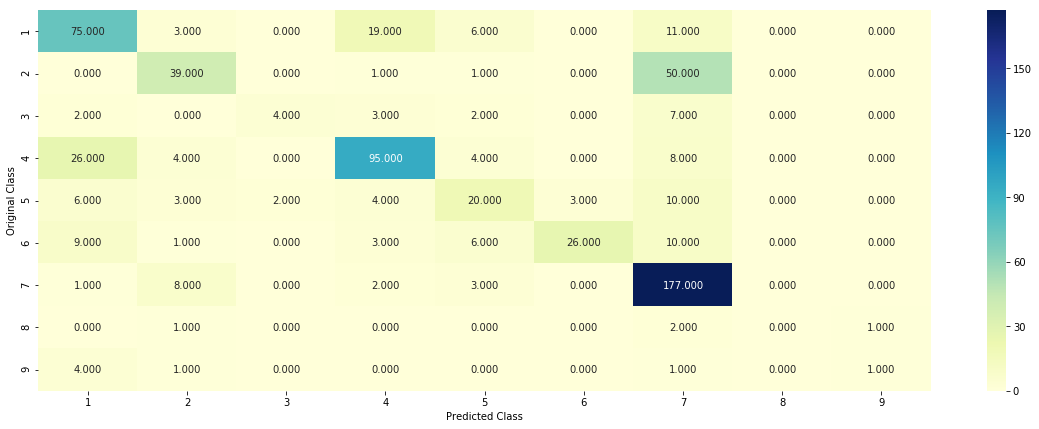

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


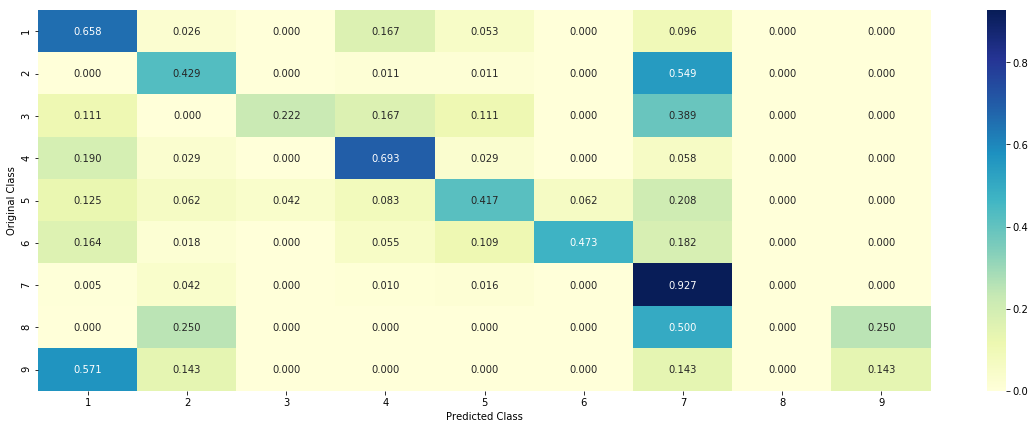

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


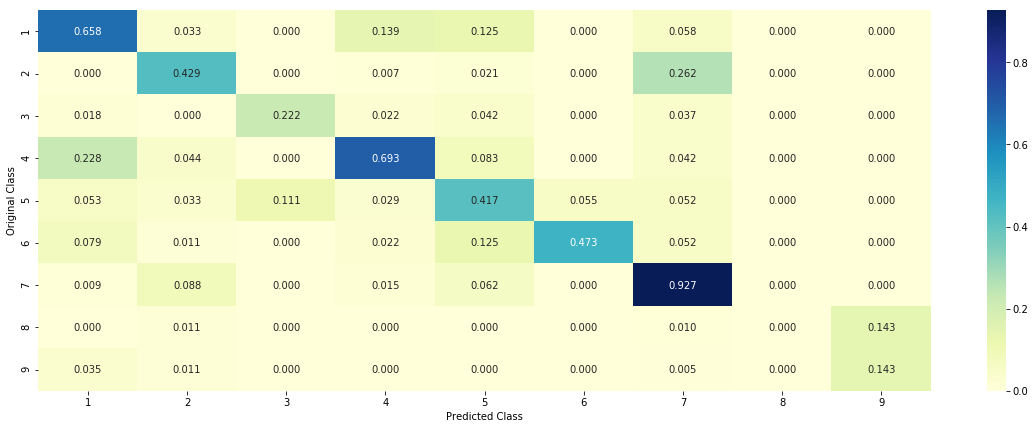

In [77]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

### Maximun Voting Classifier

Log loss (train) on the VotingClassifier : 0.8225565204519182
Log loss (CV) on the VotingClassifier : 1.1734598835020096
Log loss (test) on the VotingClassifier : 1.1704231286731304
Number of missclassified point : 0.34887218045112783
-------------------------------------------------- Confusion Matrix --------------------------------------------------


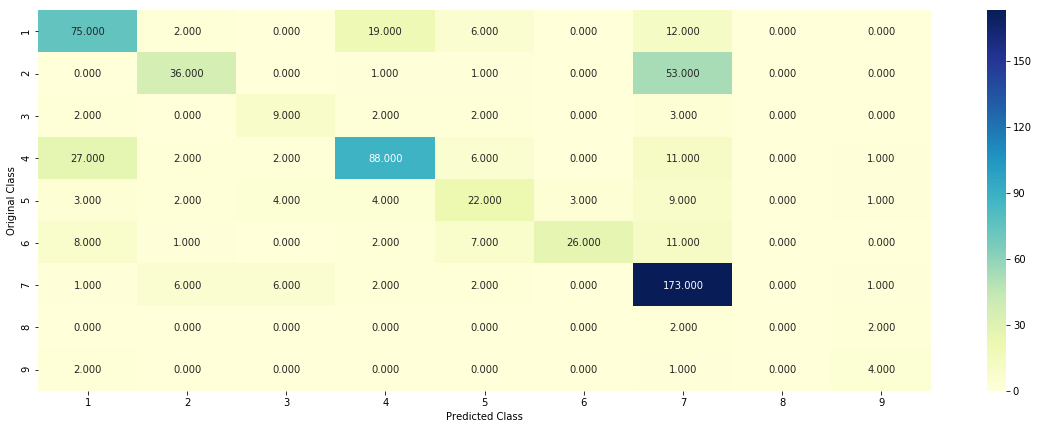

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


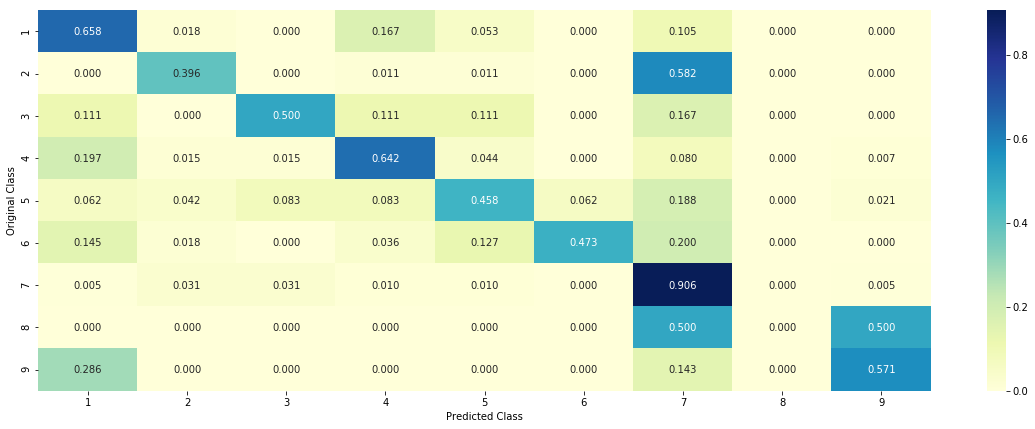

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


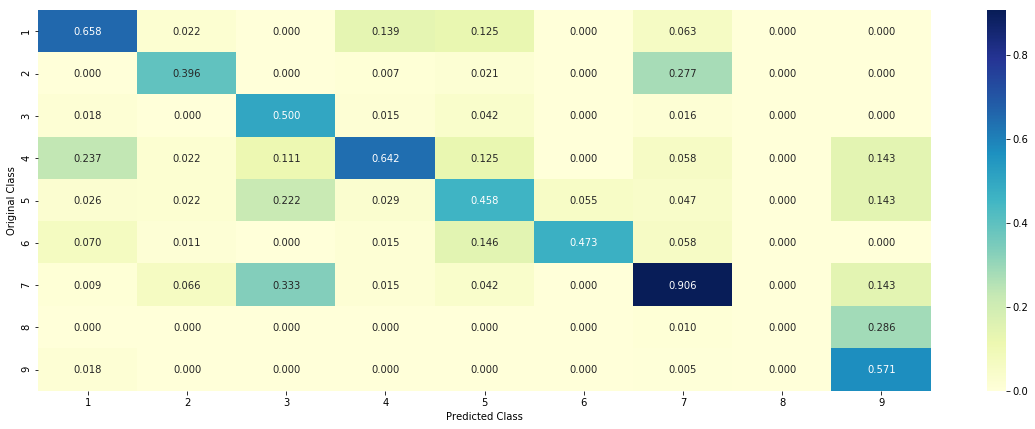

In [78]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))